In [7]:
import lbforaging
import numpy as np
import time
import matplotlib.pyplot as plt

from games.foraging import Foraging
from agents.jal_am_agent import JALAgent, JALAgentConfig
from agents.iql_agent import IQLAgent, IQLAgentConfig
from agents.dumb_agent import DumbAgent

from utils import *

In [8]:
game_config = [
        "Foraging-5x5-2p-1f-v3", # jal vs jal // iql vs jal
        "Foraging-5x5-3p-1f-v3", # iql vs iql vs jal // iql vs jal vs jal
        "Foraging-5x5-2p-1f-coop-v3", # jal and jal // iql and jal
    ]

In [9]:
configurations = {
    '0' : {
        'game': game_config[0],
        'jal': JALAgentConfig(alpha=0.1, min_epsilon=0.01, epsilon_decay=0.9995, max_t=20000, seed=1),
        'train_config': {
            'episodes': 100,
            'iterations': 50,
        },
        'agent_types': {
            'agent_0': 'jal',
            'agent_1': 'jal'
        }
    },
    '1' : {
        'game': game_config[0],
        'iql': IQLAgentConfig(alpha=0.1, min_epsilon=0.01, epsilon_decay=0.99995, max_t=1000, seed=1),
        'jal': JALAgentConfig(alpha=0.1, min_epsilon=0.01, epsilon_decay=0.9995,max_t=10000, seed=1),
        'train_config': {
            'episodes': 120,
            'iterations': 70,
        },
        'agent_types': {
        'agent_0': 'iql',
        'agent_1': 'jal'
        }
    },
    '2' : {
        'game': game_config[2],
        'iql': IQLAgentConfig(alpha=0.1, min_epsilon=0.01, epsilon_decay=0.99995, max_t=1000, seed=1),
        'jal': JALAgentConfig(alpha=0.1, min_epsilon=0.01, epsilon_decay=0.99995, max_t=20000, seed=1),
        'train_config': {
            'episodes': 100,
            'iterations': 100,
        },
        'agent_types': {
        'agent_0': 'jal',
        'agent_1': 'iql',
        'agent_2': 'jal'
        }
    },
    '3' : {
        'game': game_config[2],
        'iql': IQLAgentConfig(alpha=0.1, min_epsilon=0.01, epsilon_decay=0.99995, max_t=1000, seed=1),
        'jal': JALAgentConfig(alpha=0.1, min_epsilon=0.01, epsilon_decay=0.99995, max_t=60000, seed=1),
        'train_config': {
            'episodes': 1000,
            'iterations': 100,
        },
        'agent_types': {
        'agent_0': 'iql',
        'agent_1': 'jal',
        'agent_2': 'jal'
        }
    },
    '4' : {
        'game': game_config[2],
        'jal': JALAgentConfig(alpha=0.1, min_epsilon=0.01, epsilon_decay=0.99995, max_t=60000, seed=1),
        'jal': JALAgentConfig(alpha=0.1, min_epsilon=0.01, epsilon_decay=0.99995, max_t=60000, seed=1),
        'train_config': {
            'episodes': 1000,
            'iterations': 100,
        },
        'agent_types': {
        'agent_0': 'jal',
        'agent_1': 'jal',
        'agent_2': 'jal'
        }
    }
}

# Foraging-5x5-2p-1f-coop-v3: IQLAgent and JALAgent

In [10]:
config = configurations['3']
game = Foraging(config=config['game'], seed=1)

agents = {}

for agent_id in game.agents:
    agent_type = config['agent_types'].get(agent_id, 'iql')
    if agent_type == 'jal':
        agents[agent_id] = JALAgent(game, agent_id, config['jal'])
    else:
        agents[agent_id] = IQLAgent(game, agent_id, config['iql'])


In [11]:
game.reset()
for agent in game.agents:
    print(f"Agent: {agent}")
    print(f"Observation: {game.observe(agent)}")

Agent: agent_0
Observation: [3. 1. 4. 2. 3. 2. 0. 0. 2.]
Agent: agent_1
Observation: [3. 1. 4. 0. 0. 2. 2. 3. 2.]


In [12]:
average_rewards = train(game, agents, train_config=config['train_config'], progress=True, verbose=False, render=False)

Iteration 10 (10000 episodes)
Agent agent_0: 0.5
Agent agent_1: 0.5
Iteration 20 (20000 episodes)
Agent agent_0: 0.5
Agent agent_1: 0.5
Iteration 30 (30000 episodes)
Agent agent_0: 0.5
Agent agent_1: 0.5
Iteration 40 (40000 episodes)
Agent agent_0: 0.5
Agent agent_1: 0.5
Iteration 50 (50000 episodes)
Agent agent_0: 0.5
Agent agent_1: 0.5
Iteration 60 (60000 episodes)
Agent agent_0: 0.5
Agent agent_1: 0.5
Iteration 70 (70000 episodes)
Agent agent_0: 0.5
Agent agent_1: 0.5
Iteration 80 (80000 episodes)
Agent agent_0: 0.5
Agent agent_1: 0.5
Iteration 90 (90000 episodes)
Agent agent_0: 0.5
Agent agent_1: 0.5
Iteration 100 (100000 episodes)
Agent agent_0: 0.5
Agent agent_1: 0.5
Last average rewards over 100 iterations (100000 episodes):
Agent agent_0: 0.5
Agent agent_1: 0.5


# Foraging-5x5-2p-1f-coop-v3: IQLAgent and JALAgent

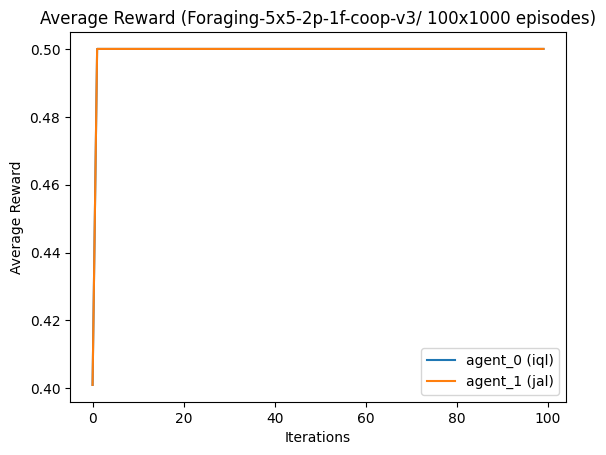

In [13]:
for agent, rewards in average_rewards.items():
    plt.plot(rewards, label=f"{agent} ({config['agent_types'][agent]})")

plt.xlabel('Iterations')
plt.ylabel('Average Reward')
plt.title(f"Average Reward ({config['game']}/ {config['train_config']['iterations']}x{config['train_config']['episodes']} episodes)")
plt.legend()
plt.show()

In [14]:
for agent in game.agents:
    agents[agent].learn = False

In [15]:
eval_rewards = {agent: [] for agent in game.agents}
rewards = play_episode(game, agents, render=False)
for agent in rewards:
    eval_rewards[agent].append(rewards[agent])
    
print("\nEvaluation results:")
for agent, rewards in eval_rewards.items():
    print(f"Agent {agent}: Avg reward = {np.mean(rewards):.2f} ± {np.std(rewards):.2f}")


Evaluation results:
Agent agent_0: Avg reward = 0.50 ± 0.00
Agent agent_1: Avg reward = 0.50 ± 0.00


---

# Foraging-5x5-2p-1f-coop-v3: JALAgent and JALAgent

In [16]:
config = configurations['4']
game = Foraging(config=config['game'], seed=1)

agents = {}

for agent_id in game.agents:
    agent_type = config['agent_types'].get(agent_id, 'jal')
    if agent_type == 'jal':
        agents[agent_id] = JALAgent(game, agent_id, config['jal'])
    else:
        agents[agent_id] = JALAgent(game, agent_id, config['jal'])

In [17]:
game.reset()
for agent in game.agents:
    print(f"Agent: {agent}")
    print(f"Observation: {game.observe(agent)}")

Agent: agent_0
Observation: [3. 1. 4. 2. 3. 2. 0. 0. 2.]
Agent: agent_1
Observation: [3. 1. 4. 0. 0. 2. 2. 3. 2.]


In [18]:
average_rewards = train(game, agents, train_config=config['train_config'], progress=True, verbose=False, render=False)

Iteration 10 (10000 episodes)
Agent agent_0: 0.5
Agent agent_1: 0.5
Iteration 20 (20000 episodes)
Agent agent_0: 0.5
Agent agent_1: 0.5
Iteration 30 (30000 episodes)
Agent agent_0: 0.5
Agent agent_1: 0.5
Iteration 40 (40000 episodes)
Agent agent_0: 0.5
Agent agent_1: 0.5
Iteration 50 (50000 episodes)
Agent agent_0: 0.5
Agent agent_1: 0.5
Iteration 60 (60000 episodes)
Agent agent_0: 0.5
Agent agent_1: 0.5
Iteration 70 (70000 episodes)
Agent agent_0: 0.5
Agent agent_1: 0.5
Iteration 80 (80000 episodes)
Agent agent_0: 0.5
Agent agent_1: 0.5
Iteration 90 (90000 episodes)
Agent agent_0: 0.5
Agent agent_1: 0.5
Iteration 100 (100000 episodes)
Agent agent_0: 0.5
Agent agent_1: 0.5
Last average rewards over 100 iterations (100000 episodes):
Agent agent_0: 0.5
Agent agent_1: 0.5


# Foraging-5x5-2p-1f-coop-v3: JALAgent and JALAgent

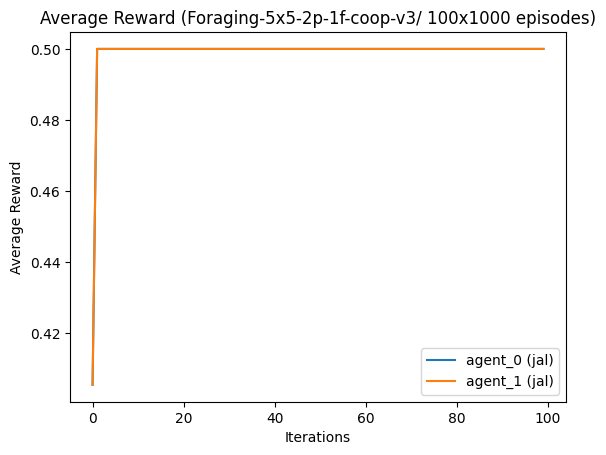

In [19]:
for agent, rewards in average_rewards.items():
    plt.plot(rewards, label=f"{agent} ({config['agent_types'][agent]})")

plt.xlabel('Iterations')
plt.ylabel('Average Reward')
plt.title(f"Average Reward ({config['game']}/ {config['train_config']['iterations']}x{config['train_config']['episodes']} episodes)")
plt.legend()
plt.show()

In [20]:
for agent in game.agents:
    agents[agent].learn = False

In [21]:
eval_rewards = {agent: [] for agent in game.agents}
rewards = play_episode(game, agents, render=False)
for agent in rewards:
    eval_rewards[agent].append(rewards[agent])
    
print("\nEvaluation results:")
for agent, rewards in eval_rewards.items():
    print(f"Agent {agent}: Avg reward = {np.mean(rewards):.2f} ± {np.std(rewards):.2f}")


Evaluation results:
Agent agent_0: Avg reward = 0.50 ± 0.00
Agent agent_1: Avg reward = 0.50 ± 0.00


---

In [22]:
export_notebook_to_html('JAL-AM.ipynb', 'notebook_exports/JAL-AM-coop')